In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('clustering_data.csv',sep=',')
X

,Alcohol,OD280/OD315
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


In [3]:
X.rename(columns = {'OD280/OD315':'Protein'}, inplace = True) 
X

,Alcohol,Protein
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


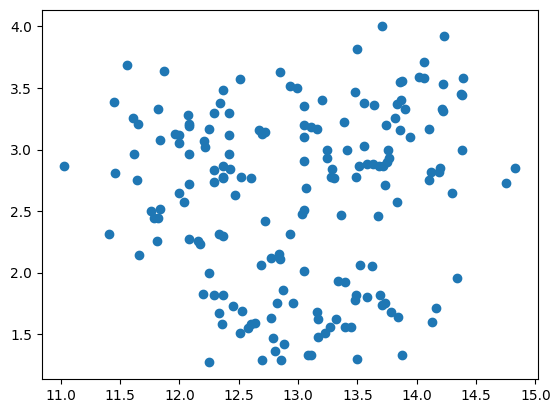

In [4]:
# fig = plt.figure()
# ax = fig.add_subplot()

# scatter = ax.scatter(X.Alcohol,X.Protein)
plt.scatter(X.Alcohol, X.Protein)

Text(0, 0.5, 'Alcohol')

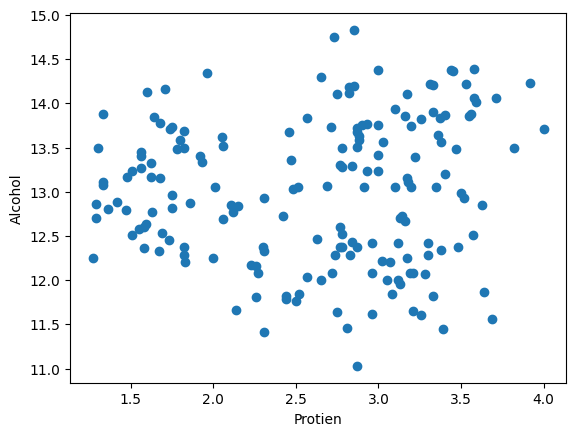

In [5]:
plt.scatter(X.Protein, X.Alcohol)
plt.xlabel("Protien")
plt.ylabel("Alcohol")

## K-Means

In [6]:
from sklearn.cluster import KMeans

### Choosing Correct Value of K - Elbow method

In [7]:
X.shape

(178, 2)

In [8]:
X

,Alcohol,Protein
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


In [10]:

def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
        
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
        
        sse.append(curr_sse)
    return sse

WSS = calculate_WSS(X.values, 10)

In [11]:
len(WSS)

10

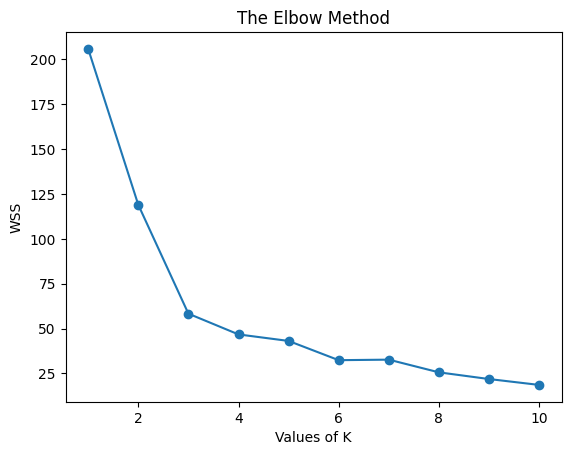

In [12]:
K = range(1, 11)
plt.plot(K,WSS, marker = 'o')
plt.xlabel('Values of K')
plt.ylabel('WSS')
plt.title('The Elbow Method')
plt.show()

### Implementation

In [13]:
model = KMeans(n_clusters = 3)
model.fit(X)
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 0 0 0 1 0 2 0 2 1 1 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[12.07981818  2.90290909]
 [13.71415385  3.14538462]
 [13.07413793  1.73741379]]


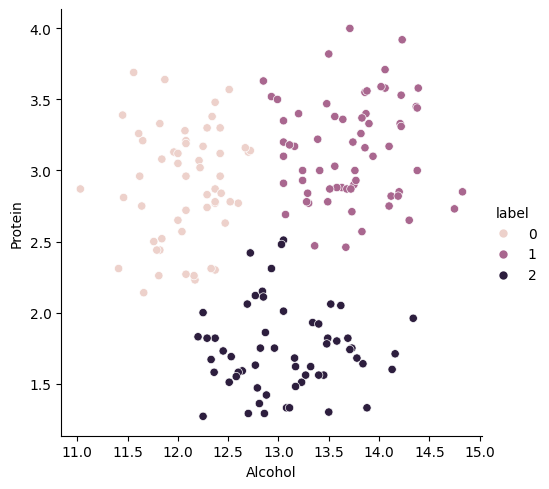

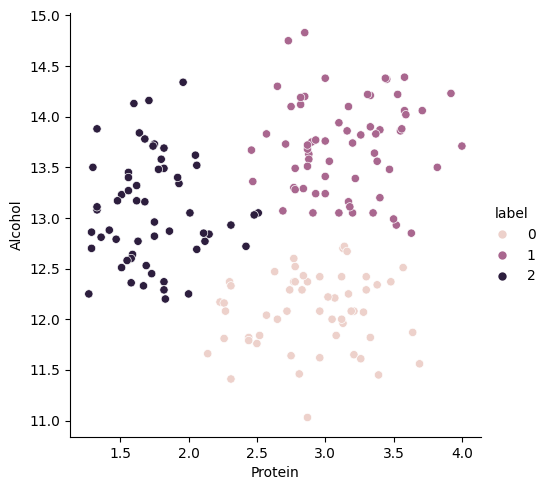

In [14]:
X['label'] = 0
for i, row in X.iterrows():
    X.at[i,'label'] = model.labels_[i]
sns.relplot(x = 'Alcohol', y = 'Protein', hue= 'label', data=X)
sns.relplot(x = 'Protein', y = 'Alcohol', hue= 'label', data=X)

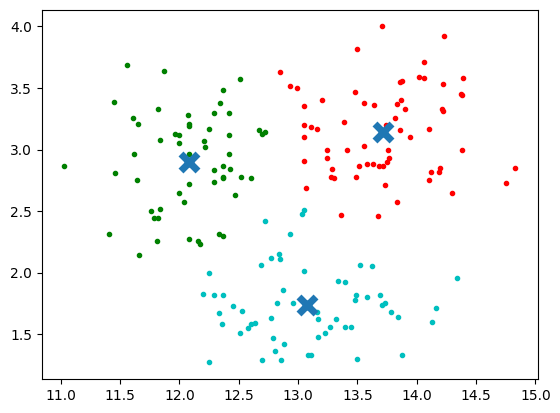

In [17]:
colors = ["g.", "r.","c."]
for i, row in X.iterrows():
    plt.plot(row.Alcohol, row.Protein, colors[model.labels_[i]])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s = 150, linewidths = 5, zorder = 10)

In [18]:
X

,Alcohol,Protein,label
0,14.23,3.92,1
1,13.20,3.40,1
2,13.16,3.17,1
3,14.37,3.45,1
4,13.24,2.93,1
...,...,...,...
173,13.71,1.74,2
174,13.40,1.56,2
175,13.27,1.56,2
176,13.17,1.62,2


In [19]:
X[X['label'] == 0]

,Alcohol,Protein,label
63,12.37,2.87,0
64,12.17,2.23,0
65,12.37,2.30,0
67,12.37,3.48,0
69,12.21,3.07,0
74,11.96,3.13,0
75,11.66,2.14,0
77,11.84,2.52,0
78,12.33,2.31,0
79,12.70,3.13,0


In [20]:
print(X[X['label'] == 0].shape)
print(X[X['label'] == 1].shape)
print(X[X['label'] == 2].shape)

(55, 3)
(65, 3)
(58, 3)
